In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
import os
rcParams['figure.figsize'] = (4,2)

In [3]:
direc = '/data/jhyl3/vel_fits'
os.listdir(direc)

['r100a-5cm.fits',
 'r10a-5cm.fits',
 'r10a3-6cm.fits',
 'r100a-4cm.fits',
 'r10a-4cm.fits',
 'r10a3-5cm.fits',
 'r100a3-5cm.fits',
 '3-5cm_radial',
 'r10a3-5cm_initial.fits',
 'r10a3-6cm_initial.fits',
 'r10a1-5cm_initial.fits',
 'r10a1-4cm_initial.fits']

In [4]:
fits_file = fits.open(direc+'/r10a-5cm.fits')

In [5]:
z, v, u = fits_file[0].data

/tmp/ipykernel_3838255/2002769664.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,5)


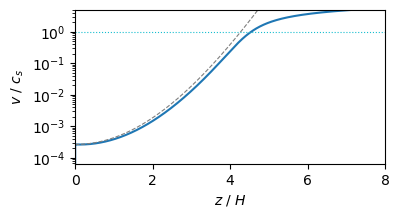

In [8]:
plt.plot(z, v)
plt.plot(z, u, ls='--', c='C7', lw=0.8)
plt.xlim(0,8)
plt.yscale('log')
plt.ylim(0,5)
plt.xlabel('$z$ / $H$')
plt.ylabel('$v$ / $c_s$')
plt.axhline(1, c='C9', ls=':', lw=0.8)

<>:16: SyntaxWarning: invalid escape sequence '\,'
<>:16: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_3502721/3028224230.py:16: SyntaxWarning: invalid escape sequence '\,'
  plt.title('$a=0.3\,\mathrm{\mu m}$ velocity profile', fontsize=9)
/tmp/ipykernel_3502721/3028224230.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('graphics/3-5cm_radial_var.png', dpi=300, bbox_inches='tight')
/home/jhyl3/.conda/envs/pyspedas/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


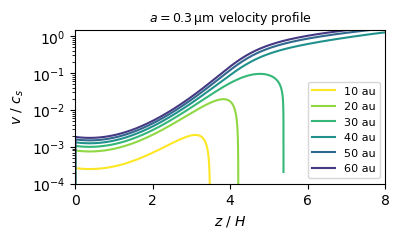

In [4]:
direc = '/data/jhyl3/vel_fits/3-5cm_radial'
color = cm.viridis(np.linspace(1, 0, len(os.listdir(direc))))
j = 0
for i in os.listdir(direc)[:-1]:
    fits_file = fits.open(direc+'/'+i)
    plt.plot(fits_file[0].data[0], fits_file[0].data[1], c=color[j], label=str(j+1)+'0 au')
    j+=1


plt.xlim(0,1e-3)
plt.yscale('log')
plt.ylim(1e-4,1.5)
plt.xlabel('$z$ / $H$')
plt.ylabel('$v$ / $c_s$')
plt.legend(prop={'size':8})
plt.title('$a=0.3\,\mathrm{\mu m}$ velocity profile', fontsize=9)
# plt.savefig('graphics/3-5cm_radial_var.png', dpi=300, bbox_inches='tight')

In [4]:
direc = '/data/jhyl3/vel_fits'
file_ls = [i for i in os.listdir(direc) if ('.fits' in i and '10a' in i)]

a3_6 = fits.open(direc+'/'+file_ls[1])[0].data
a1_5 = fits.open(direc+'/'+file_ls[0])[0].data
a3_5 = fits.open(direc+'/'+file_ls[3])[0].data
a1_4 = fits.open(direc+'/'+file_ls[2])[0].data

a3_6i = fits.open(direc+'/r10a3-6cm_initial.fits')[0].data
a3_5i = fits.open(direc+'/r10a3-5cm_initial.fits')[0].data
a1_5i = fits.open(direc+'/r10a1-5cm_initial.fits')[0].data
a1_4i = fits.open(direc+'/r10a1-4cm_initial.fits')[0].data

<>:30: SyntaxWarning: invalid escape sequence '\,'
<>:30: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_3955539/2378141253.py:30: SyntaxWarning: invalid escape sequence '\,'
  ax1.set_title('Velocity profiles at $R=10\,\\mathrm{au}$', fontsize=9)


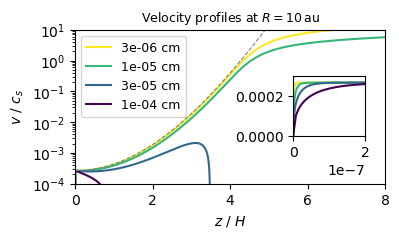

In [21]:
color = cm.viridis(np.linspace(1, 0, 4))

fig, ax1 = plt.subplots()
left, bottom, width, height = [0.67, 0.35, 0.18, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

step=10

ax1.plot(a3_6[0][::step], a3_6[1][::step], c=color[0], label=f'{3e-6:.0e}'+' cm')
ax1.plot(a1_5[0][::step], a1_5[1][::step], c=color[1], label=f'{1e-5:.0e}'+' cm')
ax1.plot(a3_5[0][::step], a3_5[1][::step], c=color[2], label=f'{3e-5:.0e}'+' cm')
ax1.plot(a1_4[0][::step], a1_4[1][::step], c=color[3], label=f'{1e-4:.0e}'+' cm')
ax1.plot(a3_6[0][::step], a3_6[2][::step], c='C7', ls='--', lw='0.8')

ax1.set_xlim(0,8)
ax1.set_yscale('log')
ax1.set_ylim(1e-4,10)
ax1.set_xlabel('$z$ / $H$')
ax1.set_ylabel('$v$ / $c_s$')

ax2.plot(a3_6i[0], a3_6i[2], c='C7', ls='--', lw='0.8')
ax2.plot(a3_6i[0], a3_6i[1], c=color[0])
ax2.plot(a1_5i[0], a1_5i[1], c=color[1])
ax2.plot(a3_5i[0], a3_5i[1], c=color[2])
ax2.plot(a1_4i[0], a1_4i[1], c=color[3])
ax2.set_xlim(0,2e-7)
ax2.set_ylim(0,3e-4)

ax1.legend(prop={'size':9}, loc='upper left')
ax1.set_title('Velocity profiles at $R=10\,\\mathrm{au}$', fontsize=9)
plt.savefig('graphics/r10_6-4cm.png', dpi=300, bbox_inches='tight')

(0.0, 0.0003)

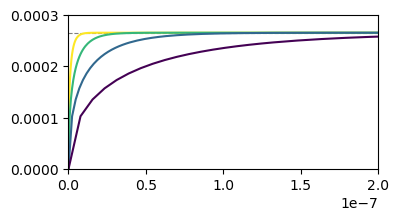

In [42]:
plt.plot(a3_6i[0], a3_6i[2], c='C7', ls='--', lw='0.8')
plt.plot(a3_6i[0], a3_6i[1], c=color[0])
plt.plot(a1_5i[0], a1_5i[1], c=color[1])
plt.plot(a3_5i[0], a3_5i[1], c=color[2])
plt.plot(a1_4i[0], a1_4i[1], c=color[3])

plt.xlim(0,2e-7)
plt.ylim(0,3e-4)